### Initial exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_rows', 150)

In [3]:
# Inspect the schema
schema2018 = pd.read_csv('data/2018/survey_results_schema.csv')
schema2018.head(10)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
5,Employment,Which of the following best describes your current employment status?
6,FormalEducation,Which of the following best describes the highest level of formal education that you’ve completed?
7,UndergradMajor,You previously indicated that you went to a college or university. Which of the following best describes your main field of study (aka 'major')
8,CompanySize,Approximately how many people are employed by the company or organization you work for?
9,DevType,Which of the following describe you? Please select all that apply.


In [4]:
# An overview of the data
data2018 = pd.read_csv('data/2018/survey_results_public.csv', low_memory=False)
data2018.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, physics)","10,000 or more employees",Database administrator;DevOps specialist;Full-stack developer;System administrator,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or software engineering",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Print number of observations in 2018
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [6]:
# Print the interesting columns
[c for c in data2018.iloc[:, [1, 2, 9, 10, 11, 12, 13, 14, 15, 53, 54, 56,62,63,64,
                              65,66,67,68,69,70,71,72,73,74,93,94,95,96,97,98,99,100,114,
                             115,116,117,118,119,121,122,123,124,125,127,128]].columns]

['Hobby',
 'OpenSource',
 'DevType',
 'YearsCoding',
 'YearsCodingProf',
 'JobSatisfaction',
 'CareerSatisfaction',
 'HopeFiveYears',
 'JobSearchStatus',
 'SalaryType',
 'ConvertedSalary',
 'CommunicationTools',
 'AgreeDisagree1',
 'AgreeDisagree2',
 'AgreeDisagree3',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'FrameworkWorkedWith',
 'FrameworkDesireNextYear',
 'IDE',
 'OperatingSystem',
 'AIDangerous',
 'AIInteresting',
 'AIResponsible',
 'AIFuture',
 'EthicsChoice',
 'EthicsReport',
 'EthicsResponsible',
 'EthicalImplications',
 'WakeTime',
 'HoursComputer',
 'HoursOutside',
 'SkipMeals',
 'ErgonomicDevices',
 'Exercise',
 'SexualOrientation',
 'EducationParents',
 'RaceEthnicity',
 'Age',
 'Dependents',
 'SurveyTooLong',
 'SurveyEasy']

In [7]:
# Determine columns concerning language
data2018.filter(like='Lang', axis=1).head()

,LanguageWorkedWith,LanguageDesireNextYear
0,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS
1,JavaScript;Python;Bash/Shell,Go;Python
2,NaN,NaN
3,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4,C;C++;Java;Matlab;R;SQL;Bash/Shell,Assembly;C;C++;Matlab;SQL;Bash/Shell


In [8]:
# First we get all the different languages
delimiter = ';'
all_languages = data2018.LanguageWorkedWith.apply(lambda c: str(c).split(delimiter))

# Make a flat list out of the list of lists
all_languages = [language for languagelist in all_languages for language in languagelist]

# No cleanup the list from nan values and duplicates
all_languages = list(filter(lambda l: l != 'nan', all_languages))
all_languages = set(all_languages)

all_languages

{'Assembly',
 'Bash/Shell',
 'C',
 'C#',
 'C++',
 'CSS',
 'Clojure',
 'Cobol',
 'CoffeeScript',
 'Delphi/Object Pascal',
 'Erlang',
 'F#',
 'Go',
 'Groovy',
 'HTML',
 'Hack',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Lua',
 'Matlab',
 'Objective-C',
 'Ocaml',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VB.NET',
 'VBA',
 'Visual Basic 6'}

In [9]:
# Now we want to make columns out of the languages for better processing
for language in all_languages:
    data2018[language] = data2018['LanguageWorkedWith'].map(lambda c: language in str(c).split(delimiter))

In [10]:
data2018.loc[:, 'C#':].head()

,C#,VB.NET,Scala,Matlab,Delphi/Object Pascal,F#,Python,Visual Basic 6,R,HTML,...,SQL,TypeScript,Assembly,Lua,PHP,Groovy,Cobol,Java,Ocaml,Go
0,False,False,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,True,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False


### Compare C# to Python

In [11]:
def csharp_or_python(col):
    ''' Function for making composite column of C# and Python '''
    if col['C#'] and col['Python']:
        return 'Both'
    elif col['C#']:
        return 'C#'
    elif col['Python']:
        return 'Python'
    return 'None'

In [12]:
# Creating combined column
data2018['C# vs Python'] = data2018.apply(lambda col: csharp_or_python(col), axis=1)

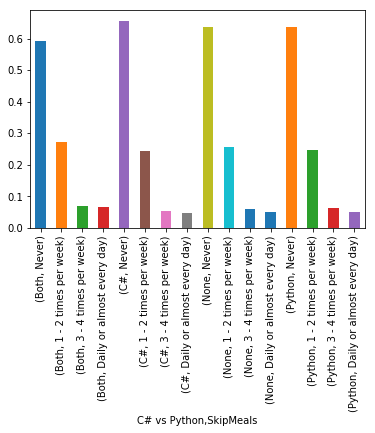

In [16]:
# Inspect some habbits over the different groups
data2018.groupby('C# vs Python')['SkipMeals'].value_counts(normalize=True).plot(kind='bar')
plt.show()

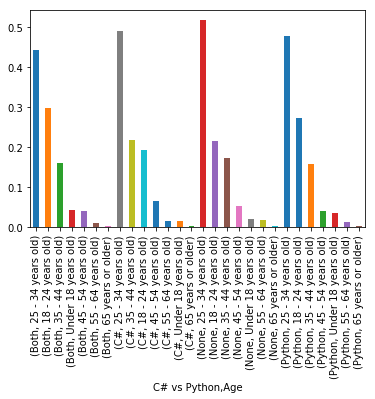

In [17]:
# Inspect the age of the groups
data2018.groupby('C# vs Python')['Age'].value_counts(normalize=True).plot(kind='bar')
plt.show()

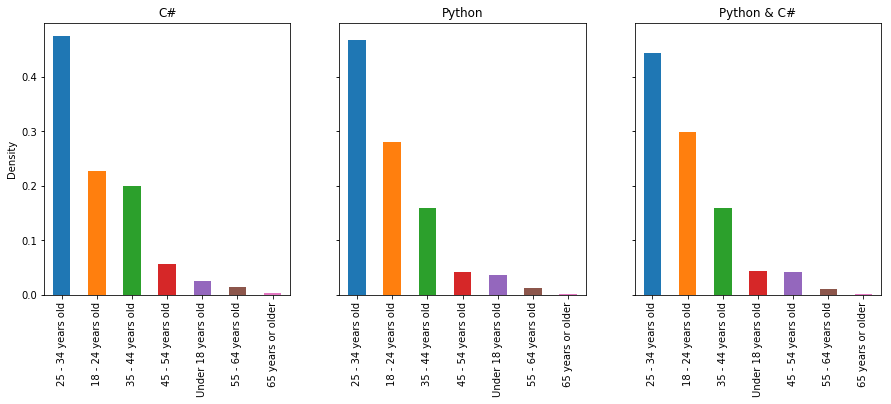

In [21]:
# Separate the different groups into subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5), sharey=True)
data2018[data2018['C#'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Age.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Age.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')
ax1.set_ylabel('Density')
plt.show()

As expected the python programmers are of younger age compared to the c# hackers

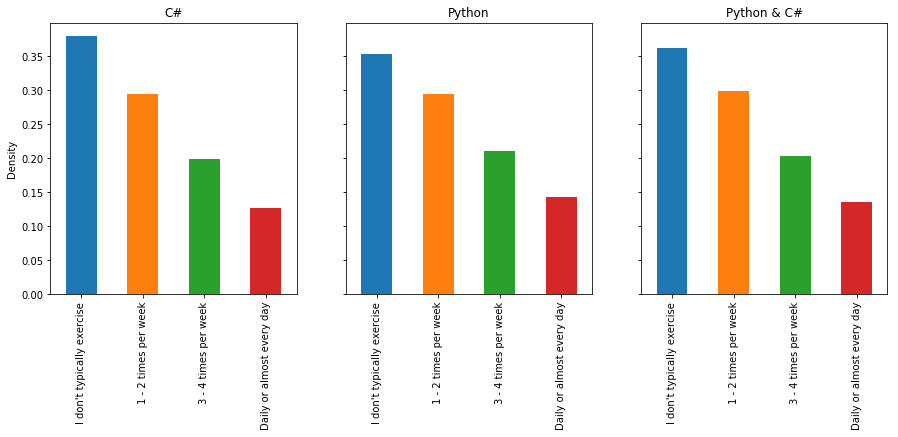

In [23]:
# How often do the different groups exercise
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 5), sharey=True)
data2018[data2018['C#'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax1)
ax1.set_title('C#')
data2018[data2018['Python'] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax2)
ax2.set_title('Python')
data2018[(data2018['Python'] == True) & (data2018['C#'] == True)].Exercise.value_counts(normalize=True).plot(kind='bar', ax=ax3)
ax3.set_title('Python & C#')
ax1.set_ylabel('Density')
plt.show()

In [24]:
# Comparing the groups in numbers
data2018.Exercise.value_counts(normalize=True)

I don't typically exercise    0.374369
1 - 2 times per week          0.290287
3 - 4 times per week          0.198563
Daily or almost every day     0.136781
Name: Exercise, dtype: float64

In [25]:
data2018.groupby('C# vs Python')['Exercise'].value_counts(normalize=True)

C# vs Python  Exercise                  
Both          I don't typically exercise    0.361083
              1 - 2 times per week          0.298774
              3 - 4 times per week          0.203779
              Daily or almost every day     0.136364
C#            I don't typically exercise    0.389060
              1 - 2 times per week          0.291703
              3 - 4 times per week          0.196814
              Daily or almost every day     0.122423
None          I don't typically exercise    0.387179
              1 - 2 times per week          0.285789
              3 - 4 times per week          0.188706
              Daily or almost every day     0.138326
Python        I don't typically exercise    0.348757
              1 - 2 times per week          0.292288
              3 - 4 times per week          0.212349
              Daily or almost every day     0.146605
Name: Exercise, dtype: float64

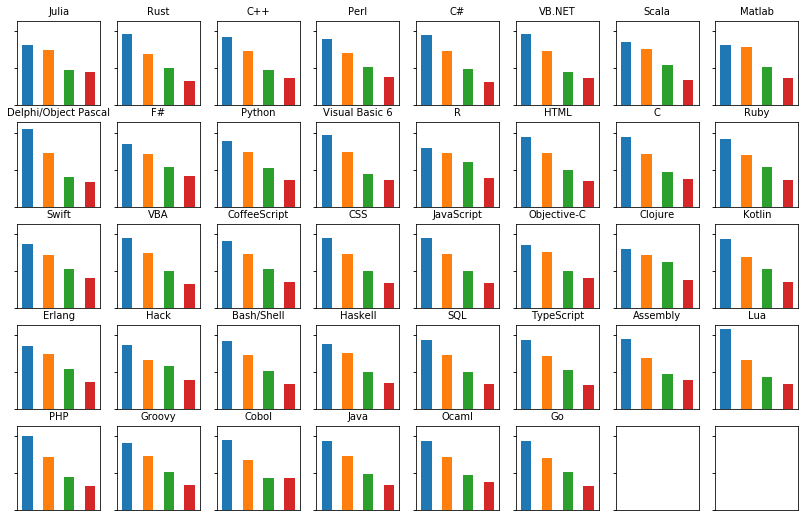

In [70]:
# Render small multiples of the distribution for comparision
number_of_columns = 8
fig, axes = plt.subplots(int(38/number_of_columns)+1, number_of_columns, figsize=(14, 9), sharey=True)
for i, lang in zip(range(38), all_languages):
    position = axes[int(i/number_of_columns), i%number_of_columns]
    data2018[data2018[lang] == True].Exercise.value_counts(normalize=True).plot(kind='bar', ax=position)
    position.set_title(lang, fontsize=10)
for i in range(40):
    position = axes[int(i/number_of_columns), i%number_of_columns]
    position.set_xticklabels([])
    position.set_yticklabels([])
    position.set_xticks([])